## Plotting word frequencies

In [2]:
!conda install nltk --yes

Solving environment: done

## Package Plan ##

  environment location: /Users/alethea/miniconda3

  added / updated specs:
    - nltk


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    click-7.1.2                |     pyhd3eb1b0_0          64 KB
    conda-4.10.0               |   py38hecd8cb5_0         2.9 MB
    nltk-3.5                   |             py_0         976 KB
    regex-2021.4.4             |   py38h9ed2024_0         308 KB
    ------------------------------------------------------------
                                           Total:         4.2 MB

The following NEW packages will be INSTALLED:

  click              pkgs/main/noarch::click-7.1.2-pyhd3eb1b0_0
  nltk               pkgs/main/noarch::nltk-3.5-py_0
  regex              pkgs/main/osx-64::regex-2021.4.4-py38h9ed2024_0

The following packages will be UPDATED:

  ca-certificates    conda-forge::ca-certificates-2020

In [3]:
import requests
from nltk import FreqDist
from nltk.corpus import stopwords
import seaborn as sns
%matplotlib inline

Download text of 'Alice in Wonderland' ebook from https://www.gutenberg.org/

In [6]:
help(requests)

Help on package requests:

NAME
    requests

DESCRIPTION
    Requests HTTP Library
    ~~~~~~~~~~~~~~~~~~~~~
    
    Requests is an HTTP library, written in Python, for human beings.
    Basic GET usage:
    
       >>> import requests
       >>> r = requests.get('https://www.python.org')
       >>> r.status_code
       200
       >>> b'Python is a programming language' in r.content
       True
    
    ... or POST:
    
       >>> payload = dict(key1='value1', key2='value2')
       >>> r = requests.post('https://httpbin.org/post', data=payload)
       >>> print(r.text)
       {
         ...
         "form": {
           "key1": "value1",
           "key2": "value2"
         },
         ...
       }
    
    The other HTTP methods are supported - see `requests.api`. Full documentation
    is at <https://requests.readthedocs.io>.
    
    :copyright: (c) 2017 by Kenneth Reitz.
    :license: Apache 2.0, see LICENSE for more details.

PACKAGE CONTENTS
    __version__
    _internal_utils

In [4]:
url = "https://www.gutenberg.org/files/11/11-0.txt"
alice = requests.get(url)
print(alice.text)

ï»¿The Project Gutenberg eBook of Aliceâs Adventures in Wonderland, by Lewis Carroll

This eBook is for the use of anyone anywhere in the United States and
most other parts of the world at no cost and with almost no restrictions
whatsoever. You may copy it, give it away or re-use it under the terms
of the Project Gutenberg License included with this eBook or online at
www.gutenberg.org. If you are not located in the United States, you
will have to check the laws of the country where you are located before
using this eBook.

Title: Aliceâs Adventures in Wonderland

Author: Lewis Carroll

Release Date: January, 1991 [eBook #11]
[Most recently updated: October 12, 2020]

Language: English

Character set encoding: UTF-8

Produced by: Arthur DiBianca and David Widger

*** START OF THE PROJECT GUTENBERG EBOOK ALICEâS ADVENTURES IN WONDERLAND ***

[Illustration]




Aliceâs Adventures in Wonderland

by Lewis Carroll

THE MILLENNIUM FULCRUM EDITION 3.0

Contents

 CHAPTER I.     Down t

In [9]:
import nltk
help(nltk)

Help on package nltk:

NAME
    nltk

DESCRIPTION
    The Natural Language Toolkit (NLTK) is an open source Python library
    for Natural Language Processing.  A free online book is available.
    (If you use the library for academic research, please cite the book.)
    
    Steven Bird, Ewan Klein, and Edward Loper (2009).
    Natural Language Processing with Python.  O'Reilly Media Inc.
    http://nltk.org/book
    
    @version: 3.5

PACKAGE CONTENTS
    app (package)
    book
    ccg (package)
    chat (package)
    chunk (package)
    classify (package)
    cli
    cluster (package)
    collections
    collocations
    compat
    corpus (package)
    data
    decorators
    downloader
    draw (package)
    featstruct
    grammar
    help
    inference (package)
    internals
    jsontags
    lazyimport
    lm (package)
    metrics (package)
    misc (package)
    parse (package)
    probability
    sem (package)
    sentiment (package)
    stem (package)
    tag (package)
    tb

Define a function to plot word frequencies

In [47]:
def plot_word_frequency(words, top_n=10):
    word_freq = FreqDist(words)
    labels = [element[0] for element in word_freq.most_common(top_n)]
    counts = [element[1] for element in word_freq.most_common(top_n)]
    plot = sns.barplot(labels, counts)
    return plot

Plot words frequencies present in the gutenberg corpus 

In [39]:
ss = FreqDist(alice.text.split())
ss.most_common(10)[0][0]
ss.most_common(10)
ss

FreqDist({'the': 1683, 'and': 783, 'to': 778, 'a': 667, 'of': 605, 'she': 485, 'said': 416, 'in': 406, 'it': 357, 'was': 329, ...})

/Users/alethea/miniconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

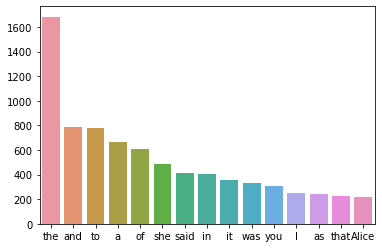

In [48]:
alice_words = alice.text.split()
plot_word_frequency(alice_words, 15)

## Stopwords

Import stopwords from nltk

In [56]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/alethea/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

Look at the list of stopwords

In [58]:
help(stopwords.words)

Help on method words in module nltk.corpus.reader.wordlist:

words(fileids=None, ignore_lines_startswith='\n') method of nltk.corpus.reader.wordlist.WordListCorpusReader instance



In [59]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

Let's remove stopwords from the following piece of text.

In [60]:
sample_text = "the great aim of education is not knowledge but action"

Break text into words

In [61]:
sample_words = sample_text.split()
print(sample_words)

['the', 'great', 'aim', 'of', 'education', 'is', 'not', 'knowledge', 'but', 'action']


Remove stopwords

In [62]:
sample_words = [word for word in sample_words if word not in stopwords.words('english')]
print(sample_words)

['great', 'aim', 'education', 'knowledge', 'action']


Join words back to sentence

In [69]:
"sadSSDD".lower()

'sadssdd'

In [63]:
sample_text = " ".join(sample_words)
print(sample_text)

great aim education knowledge action


## Removing stopwords in the genesis corpus

In [70]:
no_stops = [word for word in alice_words if word.lower() not in stopwords.words("english")]

/Users/alethea/miniconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

/Users/alethea/miniconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/alethea/miniconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 156 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/alethea/miniconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/alethea/miniconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 156 missing from current font.
  font.set_text(s, 0, flags=flags)


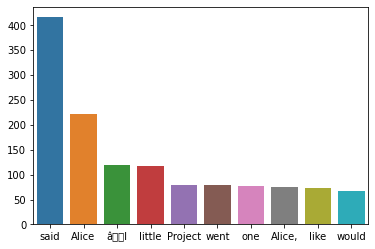

In [71]:
plot_word_frequency(no_stops, 10)

Some other things that can be done
* Need to change tokens to lower case
* Need to get rid of punctuations

All the preprocessing steps will be covered while creating the classifier